# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 12
### Rozwiązywanie równań różniczkowych metodami algebry liniowej

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 

In [0]:
import numpy as np
from scipy.linalg import norm

def chebyshev_method(A, B, iterations, l_max, l_min):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    x = np.zeros(len(B))
    r = B - np.matmul(A, x)

    for i in range(1, iterations + 1):
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif i == 2:
            beta = 0.5 * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = B - r
        if norm(r) < 1e-10:
            return x, i

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 

Równanie Poissona można zapisać w ogólnej postaci jako
$\nabla^{2}\varphi(x,y) = - 	\rho(x,y)$ <br>
gdzie <br>$\nabla^{2}$ - operator Laplace'a<br>
$\rho(x,y) = \frac{x+y}{2}$ - funkcja rozkładu źródeł<br>
Powyższe równanie można zapisać również jako <br>
$\frac{\partial^{2}\varphi(x,y)}{\partial x^{2}}$ + $\frac{\partial^{2}\varphi(x,y)}{\partial y^{2}} = -\rho(x,y)$ <br>

W naszym przypadku mamy warunki przegowe Dirichleta, więc: <br>
$\varphi(0,y) = 0$ <br>
$\varphi(n+1,y) = 0$ <br>
$\varphi(x,0) = 0$ <br> 
$\varphi(x,n+1) = 0$ <br>


Bierzemy siatkę o niezbyt dużych rozmiarach (10x10), a następnie wyliczamy przybliżenie pochodnych za pomocą różnic skończonych. <br>
### $\frac{\partial \varphi_{i,j}}{\partial x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$ <br>
### $\frac{\partial^{2} \varphi_{i,j}}{\partial x^{2}} = \frac{\varphi_{i+1,j}-2 \varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$ <br>
### $\frac{\partial \varphi_{i,j}}{\partial y} = \frac{\varphi_{i,j+1}-\varphi_{i, j-1}}{2h} + O(h^{2})$ <br>
### $\frac{\partial^{2} \varphi_{i,j}}{\partial y^{2}} = \frac{\varphi_{i,j+1}-2 \varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$ <br>
Następne podstawiamy równania do równania wyjściowego i po skróceniu otrzymujemy coś takiego <br>
## $\frac{\varphi(x_{i}, y_{j-1}) + 
\varphi(x_{i-1}, y_{j}) - 
4*\varphi(x_{i}, y_{j}) +
\varphi(x_{i+1}, y_{j}) +
\varphi(x_{i}, y_{j+1})}{h^{2}} = -\rho(x,y)$ <br>
Dla każego z punktów  $(x_{i}, y_{j})$ i wtedy nasze równanie jest zależne od $(x_{i+1}, y_{j})$, $(x_{i-1}, y_{j})$, $(x_{i}, y_{j+1})$, $(x_{i}, y_{j-1})$. Żeby policzyć wartości funkcji $\varphi$ dla każdego punktu z siatki 10x10 musimy mieć 100 równań i 100 niewiadomych






In [61]:
N = 10
phi = lambda x, y: (x + y) / 2

def create_matrix_A():
    A = np.zeros((N**2, N**2))
    for i in range(N**2):
        A[i][i] = -4
        if i - 1 >= 0: 
            A[i-1][i] = 1.0
        if i + 1 < N**2: 
            A[i+1][i] = 1.0
        if i - N >= 0: 
            A[i-N][i] = 1.0
        if i + N < N**2: 
            A[i+N][i] = 1.0
    return A

def create_matrix_B():
    b = np.zeros(N ** 2)
    c = 0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            b[c] = phi(j, i)
            c += 1
    return b

A = create_matrix_A()
B = create_matrix_B()
print(A, "\n\n")

print(B)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]] 


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  1.5  2.   2.5  3.
  3.5  4.   4.5  5.   5.5  6.   2.   2.5  3.   3.5  4.   4.5  5.   5.5
  6.   6.5  2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5  5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5 10. ]


In [62]:
res, it = chebyshev_method(A, B, 1000, 0, 2)
print(f"Liczba iteracji: {it} \n Rozwiązanie")

print(res)

Liczba iteracji: 1 
 Rozwiązanie
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459 -67.87020335 -67.03058229 -67

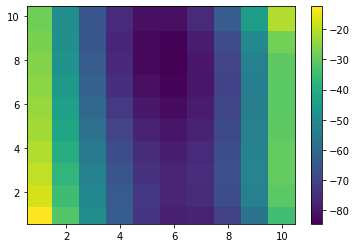

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = []
y = []
for i in range(1, N+1):
    for j in range(1, N+1):
        x.append(i)
        y.append(j)

plt.scatter(x, y, c=res, sizes=[800] * 100, alpha=1, marker="s")
plt.colorbar()
plt.show()

In [0]:
def gauss_seidl_method(A, B, iterations):
    eps = 1e-10
    x = np.zeros(len(B))
    for i in range(iterations):
        x2 = np.zeros(len(B))
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x2[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x2[i] = (B[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x2, rtol=eps):
            return x2, i
        x = x2
    return x, iterations

def sor_method(A, B, omega, iterations):
    eps = 1e-10
    x = np.zeros(len(B))
    if omega < 0 or omega > 2:
        return None, None

    n = B.shape
    x2 = np.zeros(len(B))

    for j in range(iterations):
        for i in range (n[0]):
            new_values_sum = np.dot(A[i, :i], x[:i])
            old_values_sum = np.dot(A[i, i + 1:], x2[i + 1:])
            x[i] = (B[i] - (old_values_sum + new_values_sum)) / A[i, i]
            x[i] = np.dot(x[i], omega) + np.dot(x2[i], (1 - omega))

        if np.linalg.norm(np.dot(A, x) - B) < eps:
            return x2, i
        x2 = x

    return x, iterations

In [65]:
res, it = gauss_seidl_method(A, B, 1000)
print(f"Liczba iteracji: {it} \n Rozwiązanie")

print(res)

Liczba iteracji: 99 
 Rozwiązanie
[-12.38060437 -16.96024427 -19.2916756  -20.93570111 -22.34404386
 -23.63456788 -24.82158493 -25.90515597 -26.95653165 -28.3442996
 -31.56217322 -34.66869712 -37.27075705 -39.60708501 -41.80590648
 -43.87264274 -45.74661587 -47.34250733 -48.57667104 -49.35849354
 -49.3550918  -50.88161397 -53.01557047 -55.41597541 -57.89985432
 -60.30348075 -62.44972851 -64.14158645 -65.14915167 -65.15791175
 -63.61808652 -63.98709651 -65.4939355  -67.64139187 -70.07405468
 -72.49169746 -74.60723102 -76.12495831 -76.72043748 -76.0059153
 -73.47224604 -72.9547501  -73.83168317 -75.58160192 -77.76327512
 -79.98202342 -81.86253983 -83.03057832 -83.10172469 -81.67306596
 -78.31023226 -77.02797472 -77.29644519 -78.59005758 -80.41542048
 -82.31058129 -83.83032659 -84.53309049 -83.98281704 -81.77439161
 -77.56764237 -75.55047135 -75.23606531 -76.06676274 -77.49776798
 -79.01455469 -80.1150948  -80.28864005 -79.02206138 -75.87404111
 -70.63547428 -67.87020304 -67.03058199 -67.

In [66]:
res, it = sor_method(A, B, 1.4, 1000)
print(f"Liczba iteracji: {it} \n Rozwiązanie")

print(res)

Liczba iteracji: 99 
 Rozwiązanie
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264297 -45.74661611 -47.34250757 -48.57667129 -49.3584938
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797511 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459 -67.87020335 -67.03058229 -67

Wszystkie metody dały ten sam wynik. Porównując liczbe iteracji metoda Czebyszewa jest zdecydowanie lepsza.